# Linear Regression

## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected  to score based upon the number of hours they studied. Only two variables are used for this simple regression task.

In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data Imported Successfully")
df.shape

Data Imported Successfully


(25, 2)

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


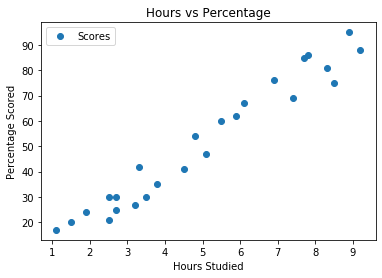

In [4]:
#Plot of Distribution of Scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

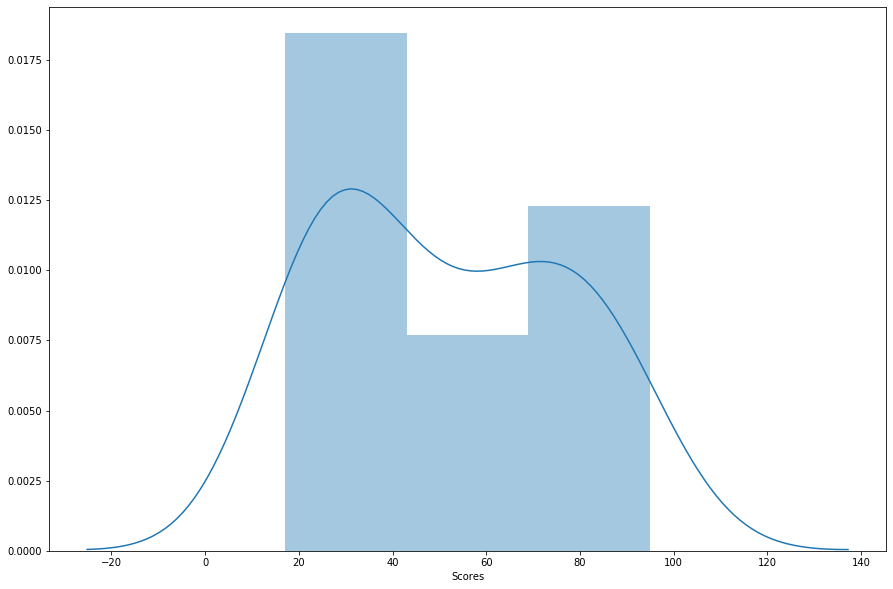

In [5]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Scores'])

# Linear Regression Model

## Preparing the Data and Spliting it into training data and test data.

In [6]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [8]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print("Training Complete")

Training Complete


In [9]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

3.105461262328781
[9.69103963]


# Making Predictions

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,17,13.765605
1,30,29.271268
2,62,60.282595
3,21,27.333060
4,25,29.271268


### Accuracy Score for Training and Test Set

In [12]:
print('Training score')
print(regressor.score(X_train, y_train))
print('Test score')
print(regressor.score(X_test, y_test))

Training score
0.9429747467236083
Test score
0.944131972730691


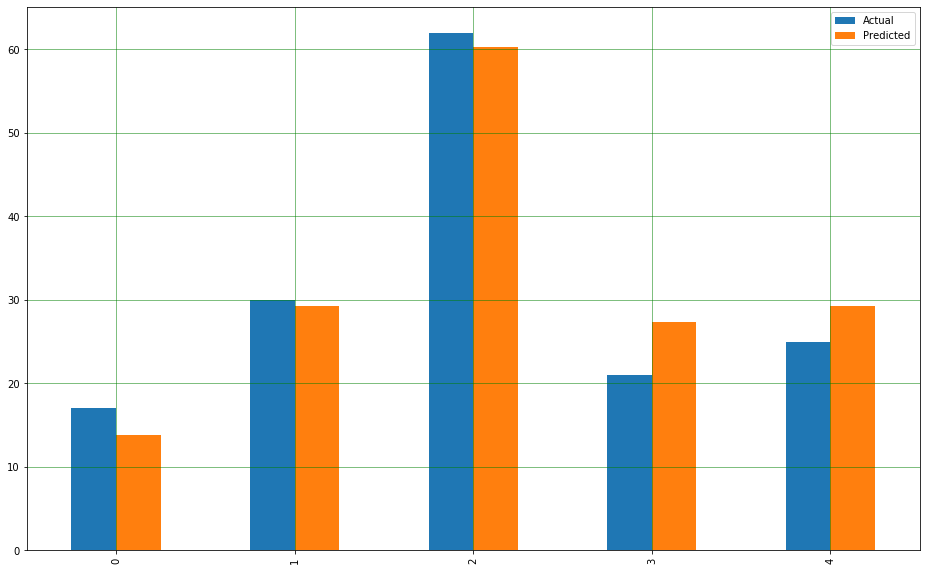

In [13]:
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Plotting Straight line with Test Data

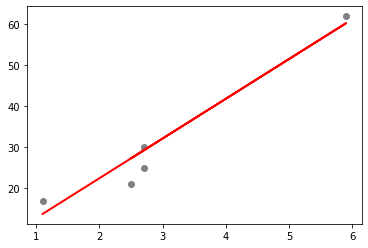

In [14]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Predicting With Own Data

In [16]:
hours = 9.25
prediction = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 92.74757780643364


# Model Evaluation Metrics

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.256972083783501
Mean Squared Error: 14.458645457297166
Root Mean Squared Error: 3.802452558191511
